In [25]:
import pickle, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from cv_paper_plots import accuracy, slope, analysis

from cv_paper_plots.style import letter_fontstyle, subject_labels

from importlib import reload

import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

In [26]:
subjects = ['ec2', 'ec9', 'gp31', 'gp33']

# ff

In [27]:
with open(os.path.join(os.environ['HOME'], 'plots_ff/model/data/frac_results_avg_ff.pkl'), 'rb') as f:
    deep_all, linear_all = pickle.load(f, encoding='latin1')

d = np.load(os.path.join(os.environ['HOME'], 'plots/ds/data/dataset_chance.npz'))
chance = d['chance_data']
training_size = d['training_size']
fracs = sorted(deep_all.keys())

output = 'plots_ff/model/data/{}_{}_hg{}_model_output.pkl'

vmax = 3.
cmax = 12.

# Old

In [33]:
with open(os.path.join(os.environ['HOME'], 'plots/model/data/frac_results.pkl'), 'rb') as f:
    deep_all, linear_all, _ = pickle.load(f, encoding='latin1')

d = np.load(os.path.join(os.environ['HOME'], 'plots/ds/data/dataset_chance.npz'))
chance = d['chance_data']
training_size = d['training_size']
fracs = sorted(deep_all.keys())

output = 'plots/model/data/{}_{}_hg_a{}_model_output.pkl'

vmax = 2.8
cmax = 9.2

vmax = 3.
cmax = 12.

In [28]:
other_linear_accuracy = {}
other_deep_accuracy = {}
linear_cv_mats = {}
deep_cv_mats = {}
linear_c_mats = {}
deep_c_mats = {}
linear_v_mats = {}
deep_v_mats = {}
deep_cv_stats = {}
linear_cv_stats = {}
for key in ['c', 'v', 'p', 'm']:
    other_linear_accuracy[key] = np.zeros((len(subjects), 3, 10))
    other_deep_accuracy[key] = np.zeros((len(subjects), 3, 10))
for key in ['sens', 'spec', 'prec', 'f1']:
    deep_cv_stats[key] = np.zeros((len(subjects), 10))
    linear_cv_stats[key] = np.zeros((len(subjects), 10))
for ii, s in enumerate(subjects):
    for style in ['_lin', '']:
        f_string = output.format(s, s, style)
        with open(os.path.join(os.environ['HOME'], f_string), 'rb') as f:
            dicts, dicts2, y_dims, has_data = pickle.load(f, encoding='latin1')
        indices_dicts2, y_hat_dicts2, logits_dicts2 = dicts2
        mats = analysis.indx_dict2conf_mat(indices_dicts2, y_dims)
        c_mat, v_mat, cv_mat = mats
        acc = analysis.conf_mat2accuracy(c_mat, v_mat, cv_mat)
        acc, (cv_sens, cv_spec, cv_prec, cv_f1) = acc
        (c_accuracy, v_accuracy, accuracy_per_cv,
         p_accuracy, m_accuracy) = acc
        cv_mat_r = analysis.indx_dict2reduced_cv_conf_mat(dicts[1],
                                                          list(dicts[1][0].values())[0][0].max()+1)
        if style == '_lin':
            d = other_linear_accuracy
            mat_d = linear_cv_mats
            mat_d_c = linear_c_mats
            mat_d_v = linear_v_mats
            stats_d = linear_cv_stats
        else:
            d = other_deep_accuracy
            mat_d = deep_cv_mats
            mat_d_c = deep_c_mats
            mat_d_v = deep_v_mats
            stats_d = deep_cv_stats
        d['c'][ii, 2] = c_accuracy
        d['v'][ii, 2] = v_accuracy
        d['p'][ii, 2] = p_accuracy
        d['m'][ii, 2] = m_accuracy
        mat_d[s] = cv_mat_r
        mat_d_c[s] = c_mat
        mat_d_v[s] = v_mat
        stats_d['sens'][ii] = cv_sens
        stats_d['spec'][ii] = cv_spec
        stats_d['prec'][ii] = cv_prec
        stats_d['f1'][ii] = cv_f1

# CV Accuracy

Subject 1: p=0.020248128505071458, hg: 30.983449546656836, delta: 5.8921156616664945
Subject 2: p=0.45651331104895454, hg: 8.156987350023462, delta: 0.7919257121292489
Subject 3: p=0.020248128505071458, hg: 11.164585947986557, delta: 1.5529967522789665
Subject 4: p=0.020248128505071458, hg: 24.233864495112922, delta: 4.340659031775058
all subject: p=8.229417452379299e-07
The highest deep network accuracy for a single subject on the consonant vowel task is for Subject 1 which is 55.1 $\pm$ 2.3\% (31.0 times chance, 1.8\%) and 44.6 $\pm$ 3.2\% (25.1 times chance, 1.8\%) for logistic regression and deep networks respectively, which is a 24.0\% improvement. Mean consonant vowel classification accuracy across subjects (XX way) with deep networks is 33.7 $\pm$ 16.4\%. For logistic regression, it is 28.0 $\pm$ 12.9\%.

The highest deep network accuracy for a single subject on the consonant task is for Subject 1 which is 59.0 $\pm$ 2.2\% (11.1 times chance, 5.3\%) and 51.2 $\pm$ 1.8\% (9.7 tim

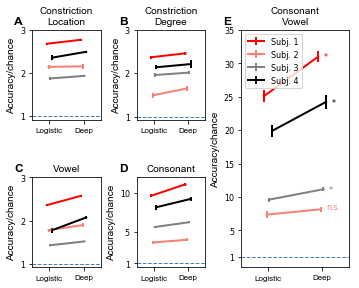

In [17]:
reload(accuracy)
reload(slope)
plt.close()
f = plt.figure(figsize=(5, 4))

le = .1
re = .02
te = .1
be = .075
h_gap = .1
v_gap = .2

cv_w = .3
big_h = (1. - te - be)
little_h = (1. - te - be - v_gap) / 2.
w = (1. - le - cv_w - h_gap - h_gap - re) / 2.

p_m_y = be + little_h + v_gap
ax_p = f.add_axes([le, p_m_y, w, little_h])
ax_m = f.add_axes([le + w + h_gap, p_m_y, w, little_h])

ax_v = f.add_axes([le, be, w, little_h])
ax_c = f.add_axes([le + w + h_gap, be, w, little_h])

ax_cv = f.add_axes([1. - re - cv_w, be, cv_w, big_h])

key = fracs[-1]

accuracy.plot_cv_accuracy(subjects, deep_all[key], linear_all[key], chance[0, :, -1], ax_cv, legend=True,
                          show_significance=True)

accuracy.plot_cv_accuracy(subjects, other_deep_accuracy['c'], other_linear_accuracy['c'],
                          chance[1, :, -1], ax_c, 'Consonant', False, ymax=cmax)
accuracy.plot_cv_accuracy(subjects, other_deep_accuracy['v'], other_linear_accuracy['v'],
                          chance[2, :, -1], ax_v, 'Vowel', False, ymax=vmax)

accuracy.plot_cv_accuracy(subjects, other_deep_accuracy['p'], other_linear_accuracy['p'],
                          chance[3, :, -1], ax_p, 'Constriction\nLocation', False, ymax=vmax)
accuracy.plot_cv_accuracy(subjects, other_deep_accuracy['m'], other_linear_accuracy['m'],
                          chance[4, :, -1], ax_m, 'Constriction\nDegree', False, ymax=vmax)

x0 = le - .05
y0 = p_m_y + little_h + .02
x1 = le + w + h_gap - .05
y1 = be + little_h + .02
x2 = 1. - re - cv_w - .05

f.text(x0, y0, 'A', **letter_fontstyle)
f.text(x1, y0, 'B', **letter_fontstyle)
f.text(x0, y1, 'C', **letter_fontstyle)
f.text(x1, y1, 'D', **letter_fontstyle)
f.text(x2, y0, 'E', **letter_fontstyle)

plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/accuracy.eps'), dpi=300)
plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/accuracy.png'), dpi=300)

# ANOVA improvement dependence on subject, model, task

In [7]:
accuracies = []

ch = chance[0, :, -1].mean(axis=-1)
da = deep_all[key][:, -1] / ch
la = linear_all[key][:, -1] / ch

for ii in range(4):
    for jj in range(10):
        accuracies.append({'subject':ii, 'accuracy':da[ii, jj],
                           'complexity': 3, 'model': 2})
        accuracies.append({'subject':ii, 'accuracy':la[ii, jj],
                           'complexity': 3, 'model': 1})
    
ch = chance[1, :, -1].mean(axis=-1)
da = other_deep_accuracy['c'][:, -1] / ch
la = other_linear_accuracy['c'][:, -1] / ch
for ii in range(4):
    for jj in range(10):
        accuracies.append({'subject':ii, 'accuracy':da[ii, jj],
                           'complexity': 2, 'model': 2})
        accuracies.append({'subject':ii, 'accuracy':la[ii, jj],
                           'complexity': 2, 'model': 1})

for ii, t in enumerate(['v', 'p', 'm']):
    ch = chance[ii+2, :, -1].mean(axis=-1)
    da = other_deep_accuracy[t][:, -1] / ch
    la = other_linear_accuracy[t][:, -1] / ch
    for ii in range(4):
        for jj in range(10):
            accuracies.append({'subject':ii, 'accuracy':da[ii, jj],
                               'complexity': 1, 'model': 2})
            accuracies.append({'subject':ii, 'accuracy':la[ii, jj],
                               'complexity': 1, 'model': 1})
df = pd.DataFrame.from_dict(accuracies)

                            OLS Regression Results                            
Dep. Variable:               accuracy   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     177.0
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          6.92e-125
Time:                        16:24:24   Log-Likelihood:                -1047.6
No. Observations:                 400   AIC:                             2113.
Df Residuals:                     391   BIC:                             2149.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

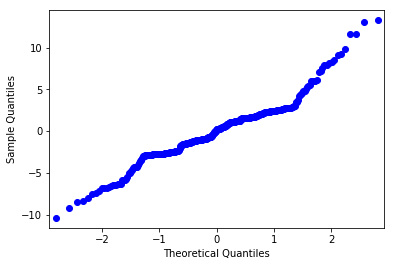

In [8]:
formula = "accuracy ~ C(subject, Treatment(0)) + C(complexity, Treatment(3)) * C(model, Treatment(1))"
lm = ols(formula, df)
fit = lm.fit()
qqplot(fit.resid)
print(fit.summary())
print('\nThe accuracy of the classifier depends on the subject, ' +
      'model type (deep network versus logistic regression), ' +
      'and task complexity (CV versus consonant versus {vowel, location, degree}) ' +
      '(ANOVA with subject, model type, task complexity, and model-task complexity interaction, ' +
      'f-value: {}, p: {}). '.format(fit.fvalue, fit.f_pvalue) +
      'Within this ANOVA, all treatment coefficients were significant ' +
      'at p<.001 with Subject 1, CV task, and logistic regression as the reference treatment.')
for table in fit.summary().tables:
    print(table.as_latex_tabular())
plt.show()

In [9]:
s = fit.summary()

# Results table

In [9]:
dcv_acc = deep_all[fracs[-1]][:, 2] * 100.
lcv_acc = linear_all[fracs[-1]][:, 2] * 100.
cv_chance = chance[0, :, -1].mean(axis=-1) * 100.
dcv_cc = np.zeros(4)
dcv_ncc = np.zeros(4)
lcv_cc = np.zeros(4)
lcv_ncc = np.zeros(4)

dc_acc = other_deep_accuracy['c'][:, 2] * 100.
lc_acc = other_linear_accuracy['c'][:, 2] * 100.
c_chance = chance[1, :, -1].mean(axis=-1) * 100.
dc_cc = np.zeros(4)
dc_ncc = np.zeros(4)
lc_cc = np.zeros(4)
lc_ncc = np.zeros(4)

dv_acc = other_deep_accuracy['v'][:, 2] * 100.
lv_acc = other_linear_accuracy['v'][:, 2] * 100.
v_chance = chance[2, :, -1].mean(axis=-1) * 100.
dv_cc = np.zeros(4)
dv_ncc = np.zeros(4)
lv_cc = np.zeros(4)
lv_ncc = np.zeros(4)

for ii, s in enumerate(subjects):
    print(deep_cv_mats[s].shape)
    dcv_cc[ii] = accuracy.channel_capacity(deep_cv_mats[s].mean(axis=0))
    dcv_ncc[ii] = accuracy.naive_channel_capacity(dcv_acc[ii].mean()/100., deep_cv_mats[s].shape[-1]+1)
    lcv_cc[ii] = accuracy.channel_capacity(linear_cv_mats[s].mean(axis=0))
    lcv_ncc[ii] = accuracy.naive_channel_capacity(lcv_acc[ii].mean()/100., linear_cv_mats[s].shape[-1]+1)
    
    dc_cc[ii] = accuracy.channel_capacity(deep_c_mats[s].mean(axis=0))
    dc_ncc[ii] = accuracy.naive_channel_capacity(dc_acc[ii].mean()/100., deep_c_mats[s].shape[-1]+1)
    lc_cc[ii] = accuracy.channel_capacity(linear_c_mats[s].mean(axis=0))
    lc_ncc[ii] = accuracy.naive_channel_capacity(lc_acc[ii].mean()/100., linear_c_mats[s].shape[-1]+1)
    
    dv_cc[ii] = accuracy.channel_capacity(deep_v_mats[s].mean(axis=0))
    dv_ncc[ii] = accuracy.naive_channel_capacity(dv_acc[ii].mean()/100., deep_v_mats[s].shape[-1]+1)
    lv_cc[ii] = accuracy.channel_capacity(linear_v_mats[s].mean(axis=0))
    lv_ncc[ii] = accuracy.naive_channel_capacity(lv_acc[ii].mean()/100., linear_v_mats[s].shape[-1]+1)

(10, 57, 57)


/home/jesse/Development/cv_paper_plots/cv_paper_plots/accuracy.py:116: RuntimeWarning: divide by zero encountered in log2
  Iyhy = Pyhy * Py * np.log2(Pyhy/Pyh)
/home/jesse/Development/cv_paper_plots/cv_paper_plots/accuracy.py:116: RuntimeWarning: invalid value encountered in multiply
  Iyhy = Pyhy * Py * np.log2(Pyhy/Pyh)


(10, 56, 56)


/home/jesse/Development/cv_paper_plots/cv_paper_plots/accuracy.py:116: RuntimeWarning: invalid value encountered in true_divide
  Iyhy = Pyhy * Py * np.log2(Pyhy/Pyh)


(10, 54, 54)
(10, 57, 57)


/home/jesse/Development/cv_paper_plots/cv_paper_plots/accuracy.py:116: RuntimeWarning: divide by zero encountered in log2
  Iyhy = Pyhy * Py * np.log2(Pyhy/Pyh)
/home/jesse/Development/cv_paper_plots/cv_paper_plots/accuracy.py:116: RuntimeWarning: invalid value encountered in multiply
  Iyhy = Pyhy * Py * np.log2(Pyhy/Pyh)
/home/jesse/Development/cv_paper_plots/cv_paper_plots/accuracy.py:116: RuntimeWarning: divide by zero encountered in log2
  Iyhy = Pyhy * Py * np.log2(Pyhy/Pyh)
/home/jesse/Development/cv_paper_plots/cv_paper_plots/accuracy.py:116: RuntimeWarning: invalid value encountered in multiply
  Iyhy = Pyhy * Py * np.log2(Pyhy/Pyh)


In [10]:
mugler2014 = {'consonant_single': 36.1,
              'consonant_avg': 20.4,
              'consonant_avg_pm': 9.8,
              'consonant_chance': 7.4,
              'vowel_single': 23.9,
              'vowel_avg': 19.2,
              'vowel_avg_pm': 3.7,
              'vowel_chance': 12.9}
mugler2014['consonant_single_cc'] = accuracy.naive_channel_capacity(mugler2014['consonant_single']/100., 24)
mugler2014['consonant_avg_cc'] = accuracy.naive_channel_capacity(mugler2014['consonant_avg']/100., 24)
mugler2014['vowel_single_cc'] = accuracy.naive_channel_capacity(mugler2014['vowel_single']/100., 15)
mugler2014['vowel_avg_cc'] = accuracy.naive_channel_capacity(mugler2014['vowel_avg']/100., 15)

def format_string(string, *data):
    acc, std, ac, ncc, cc = data
    return string.format(np.around(acc, 1), np.around(std, 1), np.around(ac, 1), np.around(ncc, 2), np.around(cc, 2))

d_cv1 = "Deep network, 57 CV, single subj.         &{} $\pm$ {}\% & {}x & {} ({} exact) \\\\\n"
d_cv2 = "Deep network, 57 CV, subj. average        &{} $\pm$ {}\% & {}x & {} ({} exact) \\\\\n"
d_cv1 = format_string(d_cv1, dcv_acc[0].mean(), dcv_acc[0].std(),
                      (dcv_acc[0]/cv_chance[0]).mean(),
                      dcv_ncc[0], dcv_cc[0])
d_cv2 = format_string(d_cv2, dcv_acc.mean(), dcv_acc.std(),
                      (dcv_acc/cv_chance).mean(),
                      dcv_ncc.mean(), dcv_cc.mean())
l_cv1 = "Logistic Regression, 57 CV, single subj.  &{} $\pm$ {}\% & {}x & {} ({} exact) \\\\\n"
l_cv2 = "Logistic Regression, 57 CV, subj. average &{} $\pm$ {}\% & {}x & {} ({} exact) \\\\\n"
l_cv1 = format_string(l_cv1, lcv_acc[0].mean(), lcv_acc[0].std(),
                      (lcv_acc[0]/cv_chance[0]).mean(),
                      lcv_ncc[0], lcv_cc[0])
l_cv2 = format_string(l_cv2, lcv_acc.mean(), lcv_acc.std(),
                      (lcv_acc/cv_chance).mean(),
                      lcv_ncc.mean(), lcv_cc.mean())
hline = "\\hline\n"
d_c1 = "Deep network, 19 cons., single subj.         &{} $\pm$ {}\% & {}x & {} ({} exact) \\\\\n"
d_c2 = "Deep network, 19 cons., subj. average        &{} $\pm$ {}\% & {}x & {} ({} exact) \\\\\n"
d_c1 = format_string(d_c1, dc_acc[0].mean(), dc_acc[0].std(),
                      (dc_acc[0]/c_chance[0]).mean(),
                      dc_ncc[0], dc_cc[0])
d_c2 = format_string(d_c2, dc_acc.mean(), dc_acc.std(),
                      (dc_acc/c_chance).mean(),
                      dc_ncc.mean(), dc_cc.mean())
l_c1 = "Logistic Regression, 19 cons., single subj.  &{} $\pm$ {}\% & {}x & {} ({} exact) \\\\\n"
l_c2 = "Logistic Regression, 19 cons., subj. average &{} $\pm$ {}\% & {}x & {} ({} exact) \\\\\n"
l_c1 = format_string(l_c1, lc_acc[0].mean(), lc_acc[0].std(),
                      (lc_acc[0]/c_chance[0]).mean(),
                      lc_ncc[0], lc_cc[0])
l_c2 = format_string(l_c2, lc_acc.mean(), lc_acc.std(),
                      (lc_acc/c_chance).mean(),
                      lc_ncc.mean(), lc_cc.mean())
m_c = ("LDA~\cite{{mugler2014}}, 24 cons., single subj.  &{}\% & {}x & {} \\\\\n" +
       "LDA~\cite{{mugler2014}}, 24 cons., subj. average &{} $\pm$ {}\% & {}x & {} \\\\\n")
m_c = m_c.format(np.around(mugler2014['consonant_single'], 1),
                 np.around(mugler2014['consonant_single']/mugler2014['consonant_chance'], 1),
                 np.around(mugler2014['consonant_single_cc'][0], 2),
                 np.around(mugler2014['consonant_avg'], 1),
                 np.around(mugler2014['consonant_avg_pm'], 1),
                 np.around(mugler2014['consonant_avg']/mugler2014['consonant_chance'], 1),
                 np.around(mugler2014['consonant_avg_cc'][0], 2))
d_v1 = "Deep network, 3 vowels, single subj.         &{} $\pm$ {}\% & {}x & {} ({} exact) \\\\\n"
d_v2 = "Deep network, 3 vowels, subj. average        &{} $\pm$ {}\% & {}x & {} ({} exact) \\\\\n"
d_v1 = format_string(d_v1, dv_acc[0].mean(), dv_acc[0].std(),
                      (dv_acc[0]/v_chance[0]).mean(),
                      dv_ncc[0], dv_cc[0])
d_v2 = format_string(d_v2, dv_acc.mean(), dv_acc.std(),
                      (dv_acc/v_chance).mean(),
                      dv_ncc.mean(), dv_cc.mean())
l_v1 = "Logistic Regression, 3 vowels, single subj.  &{} $\pm$ {}\% & {}x & {} ({} exact) \\\\\n"
l_v2 = "Logistic Regression, 3 vowels, subj. average &{} $\pm$ {}\% & {}x & {} ({} exact) \\\\\n"
l_v1 = format_string(l_v1, lv_acc[0].mean(), lv_acc[0].std(),
                      (lv_acc[0]/v_chance[0]).mean(),
                      lv_ncc[0], lv_cc[0])
l_v2 = format_string(l_v2, lv_acc.mean(), lv_acc.std(),
                      (lv_acc/v_chance).mean(),
                      lv_ncc.mean(), lv_cc.mean())
m_v = ("LDA~\cite{{mugler2014}}, 15 vowels, single subj.  &{}\% & {}x & {} \\\\\n" +
       "LDA~\cite{{mugler2014}}, 15 vowels, subj. average &{} $\pm$ {}\% & {}x & {} \\\\\n")
m_v = m_v.format(np.around(mugler2014['vowel_single'], 1),
                 np.around(mugler2014['vowel_single']/mugler2014['vowel_chance'], 1),
                 np.around(mugler2014['vowel_single_cc'][0], 2),
                 np.around(mugler2014['vowel_avg'], 1),
                 np.around(mugler2014['vowel_avg_pm'], 1),
                 np.around(mugler2014['vowel_avg']/mugler2014['vowel_chance'], 1),
                 np.around(mugler2014['vowel_avg_cc'][0], 2))
print(d_cv1 + d_cv2 + l_cv1 + l_cv2 + hline +
      d_c1 + d_c2 + l_c1 + l_c2 + m_c + hline +
      d_v1 + d_v2 + l_v1 + l_v2 + m_v)

Deep network, 57 CV, single subj.         &55.1 $\pm$ 2.3\% & 31.0x & 2.25 (3.92 exact) \\
Deep network, 57 CV, subj. average        &33.7 $\pm$ 16.4\% & 18.6x & 1.15 (2.94 exact) \\
Logistic Regression, 57 CV, single subj.  &44.6 $\pm$ 3.2\% & 25.1x & 1.63 (3.49 exact) \\
Logistic Regression, 57 CV, subj. average &28.0 $\pm$ 12.9\% & 15.5x & 0.86 (2.71 exact) \\
\hline
Deep network, 19 cons., single subj.         &59.0 $\pm$ 2.2\% & 11.1x & 1.6 (2.42 exact) \\
Deep network, 19 cons., subj. average        &41.2 $\pm$ 14.3\% & 7.7x & 0.91 (1.63 exact) \\
Logistic Regression, 19 cons., single subj.  &51.2 $\pm$ 1.8\% & 9.7x & 1.25 (2.04 exact) \\
Logistic Regression, 19 cons., subj. average &36.5 $\pm$ 12.3\% & 6.8x & 0.72 (1.41 exact) \\
LDA~\cite{mugler2014}, 24 cons., single subj.  &36.1\% & 4.9x & 0.75 \\
LDA~\cite{mugler2014}, 24 cons., subj. average &20.4 $\pm$ 9.8\% & 2.8x & 0.25 \\
\hline
Deep network, 3 vowels, single subj.         &85.9 $\pm$ 2.3\% & 2.6x & 1.19 (0.87 exact) \\

# Results Table 2

In [11]:
for deep in [True, False]:
    for ii, s in enumerate(subjects):
        string = '{}, {}  '.format(subject_labels[s], 'deep' if deep else 'logistic')
        if deep:
            data = deep_all[1.][ii, 2]
        else:
            data = linear_all[1.][ii, 2]
        string = string + '&{} $\pm$ {}\%  '.format(np.around(100*data.mean(), 1),
                                                np.around(100*data.std(), 1))
        for key in ['sens', 'spec', 'prec', 'f1']:
            if deep:
                data = deep_cv_stats[key][ii]
            else:
                data = linear_cv_stats[key][ii]
            string = string + '&{} $\pm$ {}\%  '.format(np.around(100*data.mean(), 1),
                                                    np.around(100*data.std(), 1))
        string = string + ' \\\\'
        print(string)
    string = '{}, {}  '.format('Subj. average', 'deep' if deep else 'logistic')
    if deep:
        data = deep_all[1.][:, 2]
    else:
        data = linear_all[1.][:, 2]
    string = string + '&{} $\pm$ {}\%  '.format(np.around(100*data.mean(), 1),
                                            np.around(100*data.std(), 1))
    for key in ['sens', 'spec', 'prec', 'f1']:
        if deep:
            data = deep_cv_stats[key]
        else:
            data = linear_cv_stats[key]
        string = string + '&{} $\pm$ {}\%  '.format(np.around(100*data.mean(), 1),
                                                np.around(100*data.std(), 1))
    string = string + ' \\\\'
    print(string)
    print()

Subject 1, deep  &55.1 $\pm$ 2.3\%  &54.0 $\pm$ 2.3\%  &99.2 $\pm$ 0.0\%  &56.7 $\pm$ 2.7\%  &68.2 $\pm$ 2.4\%   \\
Subject 2, deep  &15.6 $\pm$ 2.2\%  &14.3 $\pm$ 2.7\%  &98.5 $\pm$ 0.0\%  &15.2 $\pm$ 2.8\%  &20.8 $\pm$ 3.3\%   \\
Subject 3, deep  &21.1 $\pm$ 1.6\%  &20.7 $\pm$ 1.8\%  &98.6 $\pm$ 0.0\%  &20.7 $\pm$ 1.8\%  &31.8 $\pm$ 2.5\%   \\
Subject 4, deep  &43.0 $\pm$ 5.3\%  &43.2 $\pm$ 3.7\%  &99.0 $\pm$ 0.1\%  &47.5 $\pm$ 5.1\%  &56.2 $\pm$ 4.8\%   \\
Subj. average, deep  &33.7 $\pm$ 16.4\%  &33.1 $\pm$ 16.4\%  &98.8 $\pm$ 0.3\%  &35.0 $\pm$ 17.8\%  &44.2 $\pm$ 19.2\%   \\

Subject 1, logistic  &44.6 $\pm$ 3.2\%  &43.8 $\pm$ 3.4\%  &99.0 $\pm$ 0.1\%  &46.1 $\pm$ 3.1\%  &58.5 $\pm$ 3.4\%   \\
Subject 2, logistic  &14.1 $\pm$ 2.3\%  &13.3 $\pm$ 2.4\%  &98.5 $\pm$ 0.0\%  &14.4 $\pm$ 2.9\%  &19.2 $\pm$ 3.4\%   \\
Subject 3, logistic  &18.1 $\pm$ 1.5\%  &17.9 $\pm$ 1.6\%  &98.5 $\pm$ 0.0\%  &18.4 $\pm$ 1.9\%  &28.5 $\pm$ 2.6\%   \\
Subject 4, logistic  &35.3 $\pm$ 5.1\%  &35.8 $\pm$

# CV Slope

ec2 5.608485865641863 0.7604497235599879
ec9 4.203700783405717 0.7407686945505374
gp31 1.479268294670714 0.19121042983475078
gp33 11.154810088787793 2.0820429494646344
                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     25.87
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           1.73e-13
Time:                        13:59:22   Log-Likelihood:                -199.63
No. Observations:                  80   AIC:                             409.3
Df Residuals:                      75   BIC:                             421.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef

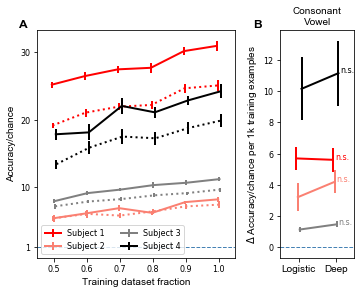

In [34]:
# reload(accuracy)
reload(slope)
plt.close()
f = plt.figure(figsize=(5, 4))

le = .1
re = .02
te = .1
be = .11
h_gap = .125

w = .55
h = 1. - te - be

ax_lines = f.add_axes([le, be, w, h])
ax_slopes = f.add_axes([le + w + h_gap, be, 1. - w - h_gap - le - re, h])

key = fracs[-1]

slope.plot_cv_slope(subjects, deep_all, linear_all, chance[0], training_size, fracs, (ax_lines, ax_slopes),
                    legend=True, show_significance=True)

x0 = .05
y0 = 1. - te + .01
x1 = le + w + h_gap - .075

f.text(x0, y0, 'A', **letter_fontstyle)
f.text(x1, y0, 'B', **letter_fontstyle)

plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/slope.eps'), dpi=300)
plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/slope.png'), dpi=300)

# Accuracy Supplement

The highest deep network accuracy for a single subject on the consonant vowel task is for Subject 1 which is 55.1 $\pm$ 2.3\% (31.0 times chance, 1.8\%) and 44.6 $\pm$ 3.2\% (25.1 times chance, 1.8\%) for logistic regression and deep networks respectively, which is a 24.0\% improvement. Mean consonant vowel classification accuracy across subjects (XX way) with deep networks is 33.7 $\pm$ 16.4\%. For logistic regression, it is 28.0 $\pm$ 12.9\%.

The highest deep network accuracy for a single subject on the consonant task is for Subject 1 which is 59.0 $\pm$ 2.2\% (11.1 times chance, 5.3\%) and 51.2 $\pm$ 1.8\% (9.7 times chance, 5.3\%) for logistic regression and deep networks respectively, which is a 15.3\% improvement. Mean consonant classification accuracy across subjects (XX way) with deep networks is 41.2 $\pm$ 14.3\%. For logistic regression, it is 36.5 $\pm$ 12.3\%.

The highest deep network accuracy for a single subject on the vowel task is for Subject 1 which is 85.9 $\pm$ 2.3

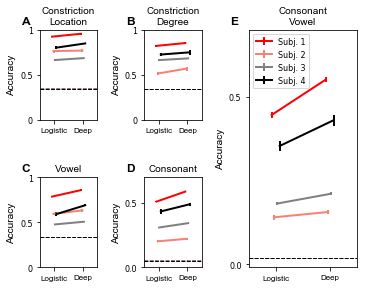

In [24]:
reload(accuracy)
reload(slope)
plt.close()
f = plt.figure(figsize=(5, 4))

le = .1
re = .02
te = .1
be = .075
h_gap = .13
v_gap = .2

cv_w = .3
big_h = (1. - te - be)
little_h = (1. - te - be - v_gap) / 2.
w = (1. - le - cv_w - h_gap - h_gap - re) / 2.

p_m_y = be + little_h + v_gap
ax_p = f.add_axes([le, p_m_y, w, little_h])
ax_m = f.add_axes([le + w + h_gap, p_m_y, w, little_h])

ax_v = f.add_axes([le, be, w, little_h])
ax_c = f.add_axes([le + w + h_gap, be, w, little_h])

ax_cv = f.add_axes([1. - re - cv_w, be, cv_w, big_h])

key = fracs[-1]

accuracy.plot_cv_accuracy(subjects, deep_all[key], linear_all[key], chance[0, :, -1], ax_cv, legend=True,
                          normalize_chance=False, ymax=.7)

accuracy.plot_cv_accuracy(subjects, other_deep_accuracy['c'], other_linear_accuracy['c'],
                          chance[1, :, -1], ax_c, 'Consonant', False, ymax=.7, normalize_chance=False)
accuracy.plot_cv_accuracy(subjects, other_deep_accuracy['v'], other_linear_accuracy['v'],
                          chance[2, :, -1], ax_v, 'Vowel', False, ymax=1, normalize_chance=False)

accuracy.plot_cv_accuracy(subjects, other_deep_accuracy['p'], other_linear_accuracy['p'],
                          chance[3, :, -1], ax_p, 'Constriction\nLocation', False, ymax=1, normalize_chance=False)
accuracy.plot_cv_accuracy(subjects, other_deep_accuracy['m'], other_linear_accuracy['m'],
                          chance[4, :, -1], ax_m, 'Constriction\nDegree', False, ymax=1, normalize_chance=False)

x0 = le - .05
y0 = p_m_y + little_h + .02
x1 = le + w + h_gap - .05
y1 = be + little_h + .02
x2 = 1. - re - cv_w - .05

f.text(x0, y0, 'A', **letter_fontstyle)
f.text(x1, y0, 'B', **letter_fontstyle)
f.text(x0, y1, 'C', **letter_fontstyle)
f.text(x1, y1, 'D', **letter_fontstyle)
f.text(x2, y0, 'E', **letter_fontstyle)

plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/accuracy2.eps'), dpi=300)
plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/accuracy2.png'), dpi=300)

# CV Slope Supplement

ec2 0.1014757076762866 0.009325644295018825
ec9 0.08089995315448253 0.013099124820416088
gp31 0.028279515305395648 0.0031839765656900445
gp33 0.22027195833758872 0.028806714101495594


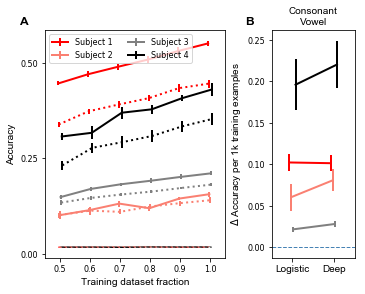

In [35]:
# reload(accuracy)
reload(slope)
plt.close()
f = plt.figure(figsize=(5, 4))

le = .12
re = .02
te = .1
be = .11
h_gap = .13

w = .5
h = 1. - te - be

ax_lines = f.add_axes([le, be, w, h])
ax_slopes = f.add_axes([le + w + h_gap, be, 1. - w - h_gap - le - re, h])

key = fracs[-1]

slope.plot_cv_slope(subjects, deep_all, linear_all, chance[0], training_size, fracs, (ax_lines, ax_slopes),
                    legend=True, normalize_chance=False)

x0 = .05
y0 = 1. - te + .02
x1 = le + w + h_gap - .075

f.text(x0, y0, 'A', **letter_fontstyle)
f.text(x1, y0, 'B', **letter_fontstyle)

plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/slope2.eps'), dpi=300)
plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/slope2.png'), dpi=300)